In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

import os
import rebound
from matplotlib import pyplot as plt

from scipy.stats import norm
import matplotlib.mlab as mlab

In [6]:
file_path = "../data/distributions/"
files = os.listdir(file_path)
long_int= [x for x in files if x[-3:]=="1e8"]
print long_int
pd_array = []
pd_name = []

['Sys_1174_1e8', 'Sys_42_1e8', 'Sys_13362_1e8', 'Sys_24763_1e8', 'Sys_19591_1e8', 'Sys_5958_1e8', 'Sys_3898_1e8', 'Sys_17641_1e8', 'Sys_12073_1e8', 'Sys_22_1e8', 'Sys_15220_1e8', 'Sys_24576_1e8', 'Sys_5505_1e8', 'Sys_24248_1e8', 'Sys_20041_1e8', 'Sys_10518_1e8', 'Sys_24017_1e8', 'Sys_18651_1e8', 'Sys_2128_1e8', 'Sys_24453_1e8', 'Sys_7431_1e8', 'Sys_4753_1e8', 'Sys_20620_1e8', 'Sys_24631_1e8', 'Sys_24346_1e8', 'Sys_21872_1e8', 'Sys_19197_1e8', 'Sys_8462_1e8', 'Sys_15003_1e8', 'Sys_23005_1e8', 'Sys_22998_1e8', 'Sys_24930_1e8', 'Sys_67_1e8', 'Sys_24824_1e8', 'Sys_24008_1e8', 'Sys_8744_1e8', 'Sys_20972_1e8', 'Sys_23975_1e8', 'Sys_3000_1e8', 'Sys_7341_1e8', 'Sys_2008_1e8', 'Sys_24705_1e8', 'Sys_16588_1e8', 'Sys_18539_1e8', 'Sys_2010_1e8', 'Sys_12840_1e8', 'Sys_24013_1e8', 'Sys_19898_1e8']


In [7]:
def get_times(row):   
    #print fcpath+row["runstring"]
    sim = rebound.Simulation.from_file(fcpath+row["runstring"])
    #shadow = rebound.Simulation.from_file(shadowfcpath+row["runstring"])
    columns = ['t']
    features = [ sim.t ]
    #print '{0:.16f}'.format(sim.t)
    return pd.Series(features, index=columns)

In [9]:
import time
start = time.time()
for i, files in enumerate(long_int):
    
    new_path = file_path+"/"+files
    #df = pd.read_csv(new_path)
    #%%time
    fcpath = new_path+'/final_conditions/fc'
    read_path = new_path+"/"+files[4:-4]+".csv"
    df=pd.read_csv(read_path)
    
    #%%time
    try:
        df = pd.concat([df, df.apply(get_times, axis=1)], axis=1)
        pd_array.append(df)
        pd_name.append(files)
    except Exception as e:
        print e
    #print read_path
    print i
end = time.time()
print (end - start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
520.844610929


In [10]:
print len(pd_array)
pd_array[1].head()

51


,Unnamed: 0,runstring,t
0,0,0000000.bin,6652.433185
1,1,0000001.bin,7976.164852
2,2,0000002.bin,6926.546410
3,3,0000003.bin,42855.955607
4,4,0000004.bin,215673.276454


In [11]:
from matplotlib import rc

rc('text',usetex=True)
rc('font',family='monospace')
rc('font',serif='Times New Roman')
rc('font',size=20,weight='black',stretch='normal',style='oblique')
rc('axes',linewidth=2)

Sys_42_1e8 4.07101066054
Sys_13362_1e8 2.08045964225
Sys_42_1e8 4.07101066054
Sys_13362_1e8 2.08045964225
Sys_19591_1e8 6.18262130787
Sys_5958_1e8 5.85950567304
Sys_17641_1e8 5.45021689843
Sys_15220_1e8 5.81040169425
Sys_5505_1e8 4.61439401305
Sys_24248_1e8 5.52614423916
Sys_20041_1e8 6.16300585959
Sys_10518_1e8 6.46584786914
Sys_4753_1e8 6.20843179642
Sys_24631_1e8 5.11616230377
Sys_24346_1e8 6.64300256059
Sys_21872_1e8 5.1954103698
Sys_19197_1e8 4.91598800821
Sys_15003_1e8 6.75109916559
Sys_23005_1e8 6.76384330619
Sys_22998_1e8 6.16872344277
Sys_24930_1e8 5.18212255808
Sys_20972_1e8 6.13148543079
Sys_23975_1e8 5.74634631972
Sys_2008_1e8 2.74415054086
Sys_24705_1e8 5.27330548612
Sys_16588_1e8 6.62868040348
Sys_19898_1e8 4.87363205722


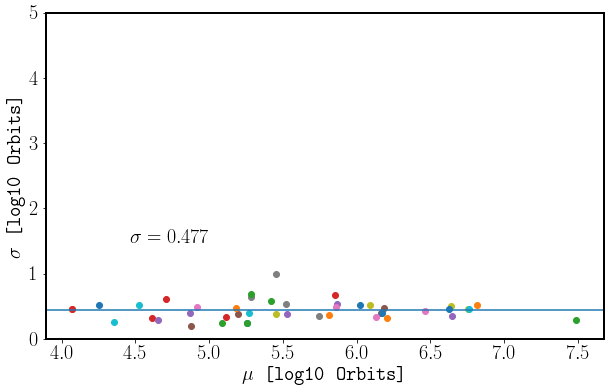

Sample average 0.441778


In [72]:
#draw a scatter plot of each of the sigmas for each system:
plt.figure(figsize=(10,6))
sample_avg = 0
count = 0
for i , panda in enumerate(pd_array):
    panda = panda[ (panda["t"]<1e8) ]

    times = np.log10(panda["t"].as_matrix())
    #x = np.linspace(times.min(), times.max(), 200)
    mu1, std1 = norm.fit(times)
    if mu1 > 3:
        plt.scatter(mu1, std1)
        sample_avg+= std1
        count +=1
    if std1> 0.3 and std1 < 0.5:
        print pd_name[i], mu1
    
plt.axhline(y=0.447)
plt.annotate(r"\sigma = 0.477",
             xycoords='figure pixels', xy=(130, 150), fontsize = 20)
plt.xlabel("$\mu$ [log10 Orbits]")
plt.ylabel("$\sigma$ [log10 Orbits]")
plt.ylim([0,5])
plt.show()
print("Sample average %f" % (sample_avg/float(count)))

In [25]:
from matplotlib import rc
rc('text',usetex=True)
rc('font',family='monospace')
rc('font',serif='Times New Roman')
rc('font',size=20,weight='black',stretch='normal',style='oblique')
rc('axes',linewidth=2)

(999, 2)
6.16300585959 0.396913231599


/mnt/raid-cita/nhussain/venv-2.7.13/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


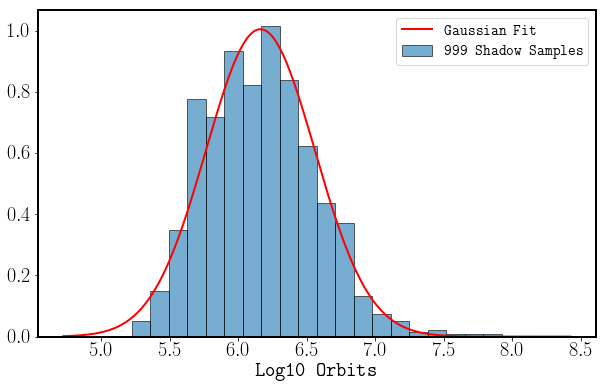

In [71]:
sim_id = 20041#5505#24930#2010#8744 These are already done
path = '../data/'
#fcpath = path +'distributions/final_conditions/fc'
fcpath = path +'distributions/Sys_'+str(sim_id)+'_1e8/final_conditions/fc'

df = pd.read_csv(path+'distributions/Sys_' +str(sim_id)+ "_1e8/"+str(sim_id)+".csv", index_col=0)
df.tail()

#%%time
df = pd.concat([df, df.apply(get_times, axis=1)], axis=1)

short_t = df[ (df["t"]<1e8)]
#short_t = df[df["t"]>83]
print short_t.shape
short_t["t"] = np.log10(short_t["t"])
#short_t['t'] = short_t.apply(np.log10(short_t["t"]), axis=1)


plt.figure(figsize=(10,6))
plt.hist(short_t["t"], bins= 20, normed=1, alpha = 0.6, lw=1,
         ec= "black", label=str(short_t.shape[0])+" Shadow Samples")

x = np.linspace(short_t["t"].min() -0.5, short_t["t"].max()+0.5, 200)
mu1, std1 = norm.fit(short_t["t"])
plt.plot(x, mlab.normpdf(x, mu1, std1), color="red", lw=2, 
         label="Gaussian Fit")
print mu1, std1
plt.xlabel(r"Log10 Orbits")
plt.legend(fontsize = 15)
plt.savefig("/home/nhussain/Documents/MLstability/Figures/SampleHist_ID_"+str(sim_id))

In [63]:
print os.getcwd()
os.listdir("/home/nhussain/Documents/MLstability/Figures/")

/mnt/raid-cita/nhussain/stability_stuff/stabilitydataset/Analysis


['TESS.png',
 'log_time_diff.png',
 'Distribution of Shadow Systems with Orbits <1e5.png',
 'IncorrectFigures',
 'SigmaProbabilities.png',
 'Mean vs Dispersion_0to4_Nice.png',
 'SigmaProbabilities2.png',
 'Model_mistakes.png',
 'Mean vs Dispersion.png',
 'XGB_updated histogram.png',
 'Mean vs Dispersion_0to4.png',
 'log_time_diff_distinct.png',
 'SampleHist_ID_2010.png',
 'Histogram_Log10_T_Diff_11017_of_25000.png',
 'SigmaProbabilities3.png',
 'local_sigmas.png',
 'VaryingParamsOverTime500.png',
 'log_time_diff_zoomed.png',
 'OptimalSigmaGaussian.png',
 'FixedSigmaGaussian.png',
 'VaryingParamsOverTime.png',
 'Sample_Systems.png',
 'SampleHist_ID_12840.png',
 'PDP_projection_attempt1.png',
 'SampleHist_ID_24017.png',
 'SampleHist_ID_3898.png',
 'theoretical_model.png',
 'PDP_RH12_RH23.png',
 'SmoothPDP.png',
 'theoretical_model_same_bins.png',
 "ColorCodedMu's_Nice.png",
 'Distribution of Shadow Systems with Orbits <1e7.png',
 'PDPM1M2.png',
 'PDPoverlargerParameterSpace.png',
 'Sampl

In [303]:
file_path = "../data/distributions/"
files = os.listdir(file_path)
long_int= [x for x in files if x[-3:]=="1e8"]
print len(long_int)

pd_array = []
pd_name = []
long_int.remove('Sys_1174_1e8')
long_int.remove('Sys_3898_1e8')
long_int.remove('Sys_15220_1e8')

print len(long_int)
print long_int

46
43
['Sys_42_1e8', 'Sys_13362_1e8', 'Sys_24763_1e8', 'Sys_19591_1e8', 'Sys_5958_1e8', 'Sys_17641_1e8', 'Sys_12073_1e8', 'Sys_22_1e8', 'Sys_24576_1e8', 'Sys_5505_1e8', 'Sys_24248_1e8', 'Sys_20041_1e8', 'Sys_10518_1e8', 'Sys_24017_1e8', 'Sys_18651_1e8', 'Sys_24453_1e8', 'Sys_7431_1e8', 'Sys_4753_1e8', 'Sys_20620_1e8', 'Sys_24631_1e8', 'Sys_24346_1e8', 'Sys_21872_1e8', 'Sys_19197_1e8', 'Sys_8462_1e8', 'Sys_15003_1e8', 'Sys_23005_1e8', 'Sys_22998_1e8', 'Sys_24930_1e8', 'Sys_67_1e8', 'Sys_24824_1e8', 'Sys_24008_1e8', 'Sys_8744_1e8', 'Sys_20972_1e8', 'Sys_23975_1e8', 'Sys_3000_1e8', 'Sys_7341_1e8', 'Sys_24705_1e8', 'Sys_16588_1e8', 'Sys_18539_1e8', 'Sys_2010_1e8', 'Sys_12840_1e8', 'Sys_24013_1e8', 'Sys_19898_1e8']


In [325]:
for files in long_int:
    files = "Sys_15220_1e8"
    values = os.listdir(file_path +"/"+files)
    val = [x for x in values if x[-3:]=="csv"]
    print val[0]
    df = pd.read_csv(file_path+"/"+files+"/"+val[0])
    print df.head()
    #del df["Unnamed: 0.1.1"]
    #del df["Unnamed: 0.1"]
    del df["Unnamed: 0"]
    #print df.tail()
    #vals = np.linspace(201, df.shape[0]-1, (df.shape[0] - 201) )
    #print vals
    short_df = df.loc[:199]
    print short_df.tail()

    #print df.tail
    print short_df.shape
    #short_df.to_csv(file_path+"/"+files+"/"+val[0])
    break
    #break

15220.csv
   Unnamed: 0    runstring
0           0  0000000.bin
1           1  0000001.bin
2           2  0000002.bin
3           3  0000003.bin
4           4  0000004.bin
       runstring
195  0000195.bin
196  0000196.bin
197  0000197.bin
198  0000198.bin
199  0000199.bin
(200, 1)
